# Model Building 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [2]:
df = pd.read_csv("./data/new_merged.csv")
df.head()

,Unnamed: 0,subject,body,label,sender_email,receiver_email,url,url_names
0,0,"Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...,1,RickyAmes@aol.com,the00@speedy.uwaterloo.ca,0,NaN
1,1,Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",0,yan.morin@savoirfairelinux.com,debian-mirrors@lists.debian.org,1,http://gulus.usherbrooke.ca/debian/README
2,2,authentic viagra,Mega authenticV I A G R A $ DISCOUNT priceC...,1,7stocknews@tractionmarketing.com,the00@plg.uwaterloo.ca,1,http://www.moujsjkhchum.com
3,3,Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t...",1,vqucsmdfgvsg@ruraltek.com,opt4@speedy.uwaterloo.ca,1,http://ctmay.com
4,4,or trembling; stomach cramps; trouble in sleep...,"\nsystem"" of the home. It will have the capab...",1,dcube@totalink.net,ktwarwic@speedy.uwaterloo.ca,0,NaN


In [3]:
df.isnull().sum()

Unnamed: 0            0
subject               0
body                  0
label                 0
sender_email          0
receiver_email        0
url                   0
url_names         79903
dtype: int64

In [4]:
# Combine subject and body 

df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')


In [5]:
df['text']

0         Generic Cialis, branded quality@  \n\n\n\n\n\n...
1         Typo in /debian/README Hi, i've just updated f...
2         authentic viagra Mega  authenticV I A G R A   ...
3         Nice talking with ya \nHey Billy, \n\nit was r...
4         or trembling; stomach cramps; trouble in sleep...
                                ...                        
160826    25�� ���� ���ͳ� ��ġ�ϰ� -��� ����8������ �޾ư���...
160827    US-CERT Cyber Security Bulletin SB06-142 -- Vu...
160828    2006  LUCKY DRAW: ( FINAL NOTICE ) LUCKY DRAW,...
160829    [DMDX] short sound files I am running a script...
160830    [DMDX] Re: short sound files Yeah, a number of...
Name: text, Length: 160831, dtype: object

In [6]:
# Vectorize text

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [7]:
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

In [8]:
# split data    

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [9]:
X_train.shape , X_test.shape

((128664, 5000), (32167, 5000))

In [10]:
# Train Logistic Regression Model 

lgr = LogisticRegression()
lgr.fit(X_train , y_train)

LogisticRegression()

In [11]:
# Evaluate 
y_pred = lgr.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9723940684552491
[[16986   482]
 [  406 14293]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17468
           1       0.97      0.97      0.97     14699

    accuracy                           0.97     32167
   macro avg       0.97      0.97      0.97     32167
weighted avg       0.97      0.97      0.97     32167



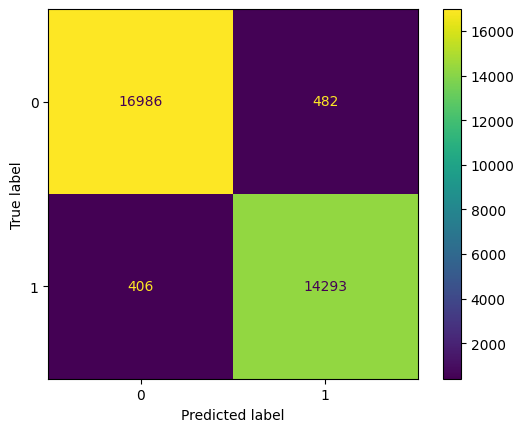

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

0.9386638480430255
[[16697   771]
 [ 1202 13497]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     17468
           1       0.95      0.92      0.93     14699

    accuracy                           0.94     32167
   macro avg       0.94      0.94      0.94     32167
weighted avg       0.94      0.94      0.94     32167



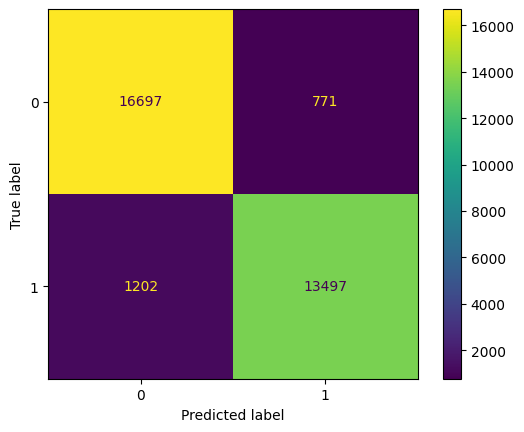

In [13]:
# Train Naive Bayes 

from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train , y_train)

y_pred = NB.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train , y_train)

DecisionTreeClassifier()

0.9533683588771101
[[16716   752]
 [  748 13951]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17468
           1       0.95      0.95      0.95     14699

    accuracy                           0.95     32167
   macro avg       0.95      0.95      0.95     32167
weighted avg       0.95      0.95      0.95     32167



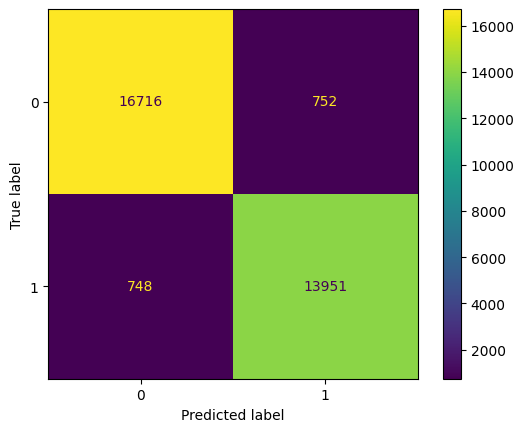

In [15]:
y_pred = DTC.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

0.9773681101750241
[[17234   234]
 [  494 14205]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17468
           1       0.98      0.97      0.98     14699

    accuracy                           0.98     32167
   macro avg       0.98      0.98      0.98     32167
weighted avg       0.98      0.98      0.98     32167



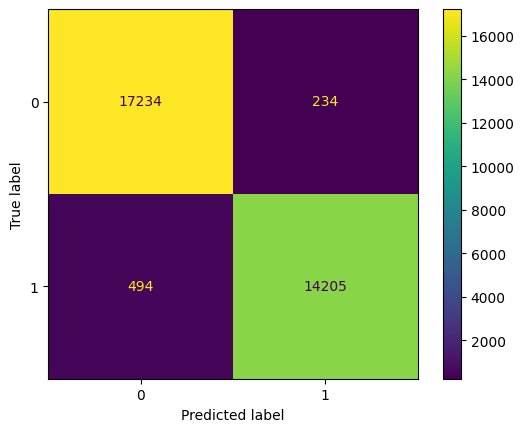

In [16]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train , y_train)

y_pred = RFC.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

0.9838965399322287
[[17196   272]
 [  246 14453]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     17468
           1       0.98      0.98      0.98     14699

    accuracy                           0.98     32167
   macro avg       0.98      0.98      0.98     32167
weighted avg       0.98      0.98      0.98     32167



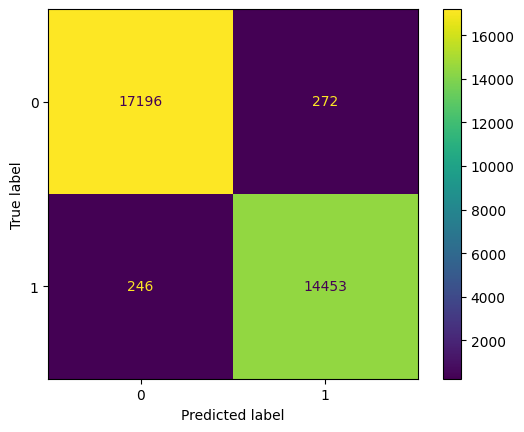

In [17]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train , y_train)

y_pred = svc.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout

model = Sequential([
    Dense(256 , activation='relu' , input_shape = (X_train.shape[1],)) ,
    Dropout(0.5) ,
    Dense(128 , activation = 'relu' ) ,
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train , y_train , batch_size = 32 , epochs = 10 , validation_data = (X_test , y_test))

loss , accuracy = model.evaluate(X_test , y_test )
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9472 - loss: 0.1281 - val_accuracy: 0.9768 - val_loss: 0.0612
Epoch 2/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9863 - loss: 0.0405 - val_accuracy: 0.9819 - val_loss: 0.0517
Epoch 3/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9833 - val_loss: 0.0540
Epoch 4/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9834 - val_loss: 0.0637
Epoch 5/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9837 - val_loss: 0.0671
Epoch 6/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.9982 - loss: 0.0060 - val_accuracy: 0.9843 - val_loss: 0.0803
Epoch 7/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9844 - val_loss: 0.0837
Epoch 8/10
4021/4021 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9990 - loss:

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions (convert probabilities to binary values)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17468
           1       0.98      0.98      0.98     14699

    accuracy                           0.98     32167
   macro avg       0.98      0.98      0.98     32167
weighted avg       0.98      0.98      0.98     32167

[[17212   256]
 [  246 14453]]
